In [1]:
import pandas as pd

SUPPLY CHAIN LOGISTIC 

In [89]:
scl = pd.read_excel(
    "data/Supply_chain_logistics_problem.xlsx",
    engine="openpyxl",
    dtype_backend="pyarrow",
    sheet_name=None,
)

Базова інформація та базові дії
Розбиття на таблички

In [3]:
print(scl.keys())

dict_keys(['OrderList', 'FreightRates', 'WhCosts', 'WhCapacities', 'ProductsPerPlant', 'VmiCustomers', 'PlantPorts'])


In [90]:
orders = scl['OrderList'].copy()
rates = scl['FreightRates'].copy()
wh_costs = scl['WhCosts'].copy()
wh_capacities = scl['WhCapacities'].copy()
products_per_plant = scl['ProductsPerPlant'].copy()
vmi_customers = scl['VmiCustomers'].copy()
plant_ports = scl['PlantPorts'].copy()

Етап 1. перевірка даних

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype                 
---  ------                --------------  -----                 
 0   Order ID              9215 non-null   double[pyarrow]       
 1   Order Date            9215 non-null   timestamp[us][pyarrow]
 2   Origin Port           9215 non-null   string[pyarrow]       
 3   Carrier               9215 non-null   string[pyarrow]       
 4   TPT                   9215 non-null   int64[pyarrow]        
 5   Service Level         9215 non-null   string[pyarrow]       
 6   Ship ahead day count  9215 non-null   int64[pyarrow]        
 7   Ship Late Day count   9215 non-null   int64[pyarrow]        
 8   Customer              9215 non-null   string[pyarrow]       
 9   Product ID            9215 non-null   int64[pyarrow]        
 10  Plant Code            9215 non-null   string[pyarrow]       
 11  Destination Port      9215 non

In [13]:
orders.describe()

,Order ID,Order Date,TPT,Ship ahead day count,Ship Late Day count,Product ID,Unit quantity,Weight
count,9215.0,9215,9215.0,9215.0,9215.0,9215.0,9215.0,9215.0
mean,1447273698.881769,2013-05-26 00:00:00,1.717743,1.852306,0.039935,1680536.058709,3202.747151,19.871688
min,1447125805.7,2013-05-26 00:00:00,0.0,0.0,0.0,1613321.0,235.0,0.0
25%,1447196681.2,2013-05-26 00:00:00,1.0,0.0,0.0,1669702.0,330.0,1.40743
50%,1447275684.7,2013-05-26 00:00:00,2.0,3.0,0.0,1683636.0,477.0,4.44
75%,1447346498.7,2013-05-26 00:00:00,2.0,3.0,0.0,1689554.0,1275.5,13.325673
max,1447425230.7,2013-05-26 00:00:00,4.0,6.0,6.0,1702654.0,561847.0,2338.405126
std,83816.29279,NaN,0.6305,1.922302,0.319625,15265.927778,15965.62226,66.569064


In [16]:
orders.isnull()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9211,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9212,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9213,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
orders['Order ID'].unique()

<ArrowExtensionArray>
[1447296446.7, 1447158014.7, 1447138898.7, 1447363527.7, 1447363980.7,
 1447351440.7, 1447320235.7, 1447158018.7, 1447219340.7, 1447398415.7,
 ...
 1447390637.7, 1447152945.7, 1447288445.7, 1447350450.7, 1447148658.7,
 1447305022.7, 1447318796.7, 1447322251.7, 1447145318.7, 1447328130.7]
Length: 9215, dtype: double[pyarrow]

In [19]:
orders.isnull().sum()

Order ID                0
Order Date              0
Origin Port             0
Carrier                 0
TPT                     0
Service Level           0
Ship ahead day count    0
Ship Late Day count     0
Customer                0
Product ID              0
Plant Code              0
Destination Port        0
Unit quantity           0
Weight                  0
dtype: int64

Можемо зробити висновок, що дані є добре підготовленими для роботи з ними.

Етап 2. Відповіді на бізнес питання

Задача №1
Скільки витрачається на зберігання товару на заводі? І на яке замовлення, іде найбільше витрат?

In [20]:
wh_costs

,WH,Cost/unit
0,PLANT15,1.415063
1,PLANT17,0.428947
2,PLANT18,2.036254
3,PLANT05,0.488144
4,PLANT02,0.477504
5,PLANT01,0.566976
6,PLANT06,0.554088
7,PLANT10,0.493582
8,PLANT07,0.371424
9,PLANT14,0.63433


In [32]:
orders.sample(10)

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
5145,1447399166.7,2013-05-26 00:00:00,PORT04,V444_0,2,DTP,0,0,V555555555_27,1687346,PLANT03,PORT09,1295,19.58
6840,1447204404.7,2013-05-26 00:00:00,PORT04,V444_0,2,DTP,5,0,V55555555_7,1699670,PLANT03,PORT09,3844,11.0956
3939,1447175181.7,2013-05-26 00:00:00,PORT04,V444_0,2,DTP,0,0,V55555_26,1667817,PLANT03,PORT09,2085,30.4893
6471,1447165247.7,2013-05-26 00:00:00,PORT04,V444_0,2,DTP,5,0,V55555555_7,1683409,PLANT03,PORT09,247,0.750596
5045,1447350459.7,2013-05-26 00:00:00,PORT04,V444_0,2,DTP,0,0,V555555555_27,1680781,PLANT03,PORT09,345,2.059668
6819,1447241399.7,2013-05-26 00:00:00,PORT04,V444_0,2,DTP,5,0,V55555555_7,1672117,PLANT03,PORT09,325,0.3248
460,1447229002.7,2013-05-26 00:00:00,PORT04,V44_3,2,CRF,3,0,V55555_2,1674853,PLANT03,PORT09,315,4.103086
6900,1447189559.7,2013-05-26 00:00:00,PORT04,V444_0,2,DTD,0,0,V555_41,1692333,PLANT03,PORT09,11266,2.991412
235,1447241593.7,2013-05-26 00:00:00,PORT04,V44_3,4,CRF,0,0,V555555555555555_29,1699555,PLANT03,PORT09,1094,2.910981
4434,1447144656.7,2013-05-26 00:00:00,PORT04,V444_0,2,DTP,0,0,V55555555_5,1651299,PLANT03,PORT09,2258,6.0


In [91]:
merged_ow = pd.merge(orders, wh_costs, left_on='Plant Code', right_on='WH', how='left')

In [92]:
merged_ow['storage_cost'] = merged_ow['Unit quantity'] * merged_ow['Cost/unit'].sort_values()
merged_ow = merged_ow.sort_values('storage_cost', ascending=False)

In [93]:
merged_ow[['Order ID', 'Origin Port', 'Plant Code', 'storage_cost']]

,Order ID,Origin Port,Plant Code,storage_cost
6858,1447234624.7,PORT04,PLANT03,290756.885304
6880,1447166079.7,PORT04,PLANT03,242836.21014
6883,1447233203.7,PORT04,PLANT03,234986.741447
6882,1447395127.7,PORT04,PLANT03,225994.628579
6865,1447299256.7,PORT04,PLANT03,199050.375089
...,...,...,...,...
7011,1447272938.7,PORT04,PLANT13,116.017643
6944,1447163960.7,PORT04,PLANT13,115.547936
6987,1447295783.7,PORT04,PLANT13,115.078229
6952,1447240886.7,PORT04,PLANT13,114.608522


Отже, найбільші витрати приходяться на ORDER ID 1447234624.7, а саме 290756.885304
 

Задача №2 Проаналізувати загальні витрати. Зберігання + перевезення + інше

In [115]:
merged_or = pd.merge(
    orders,
    rates,
    left_on=['Carrier', 'Origin Port', 'Destination Port'],
    right_on=['Carrier', 'orig_port_cd', 'dest_port_cd'],
    how='left',
    validate='many_to_many'
)

filt = (
    (merged_or['Weight'] >= merged_or['minm_wgh_qty']) &
    (merged_or['Weight'] <= merged_or['max_wgh_qty'])
)

merged_or = merged_or[filt].copy()
merged_or['transport_cost'] = merged_or['Weight'] * merged_or['rate']

transport_per_order = (merged_or.groupby(['Order ID', 'Plant Code'], as_index=False)['transport_cost'].sum())
storage_per_order = (merged_ow.groupby('Order ID', as_index=False)['storage_cost'].sum())


In [116]:
total_cost = pd.merge(
    transport_per_order,
    storage_per_order,
    on='Order ID',
    how='left',
    validate='one_to_one'
)

In [152]:
total_cost['Total_cost'] = (total_cost['transport_cost'] + total_cost['storage_cost']).round(2)
total_cost.sort_values('Total_cost', ascending=False)

,Order ID,Plant Code,transport_cost,storage_cost,Total_cost
2854,1447234624.7,PLANT03,122.097712,290756.885304,290878.98
902,1447166079.7,PLANT03,106.8672,242836.21014,242943.08
2837,1447233203.7,PLANT03,86.8296,234986.741447,235073.57
6395,1447395127.7,PLANT03,85.0872,225994.628579,226079.72
4196,1447299256.7,PLANT03,108.116115,199050.375089,199158.49
...,...,...,...,...,...
781,1447163961.7,PLANT13,0.115423,116.957057,117.07
4104,1447295783.7,PLANT13,1.613424,115.078229,116.69
780,1447163960.7,PLANT13,0.34008,115.547936,115.89
2981,1447240886.7,PLANT13,0.589321,114.608522,115.2


Отже найдорожчим виявилось замовлення 1447234624.7, з заводу PLANT03 

Чому ціни настільки високі?

In [146]:
merged_ow[merged_ow['Order ID'] == 1447234624.7][['Order ID', 'Plant Code', 'Unit quantity', 'Cost/unit', 'storage_cost']]

,Order ID,Plant Code,Unit quantity,Cost/unit,storage_cost
6858,1447234624.7,PLANT03,561847,0.517502,290756.885304


In [147]:
merged_ow['Unit quantity'].max()

561847

In [131]:
merged_ow['Unit quantity'].mean()

3202.7471513836135

In [133]:
merged_ow['Unit quantity'].min()

235

Отже, ціни високі через велику кількість юнітів, що проходять.

ВИТРАТИ НА 1 ЗАВОД (+ ДІАГРАМА)

In [158]:
plant_stats = total_cost.groupby('Plant Code').agg({'Total_cost': 'sum', 'Order ID': 'count'}).reset_index().sort_values('Total_cost', ascending=False)

In [160]:
plant_stats

,Plant Code,Total_cost,Order ID
0,PLANT03,12270264.05,6548
1,PLANT08,144832.16,101
5,PLANT16,140272.76,34
2,PLANT09,104192.16,12
3,PLANT12,63442.07,210
4,PLANT13,21508.08,86


 Тепер побудуємо діаграму для візуалізації результату

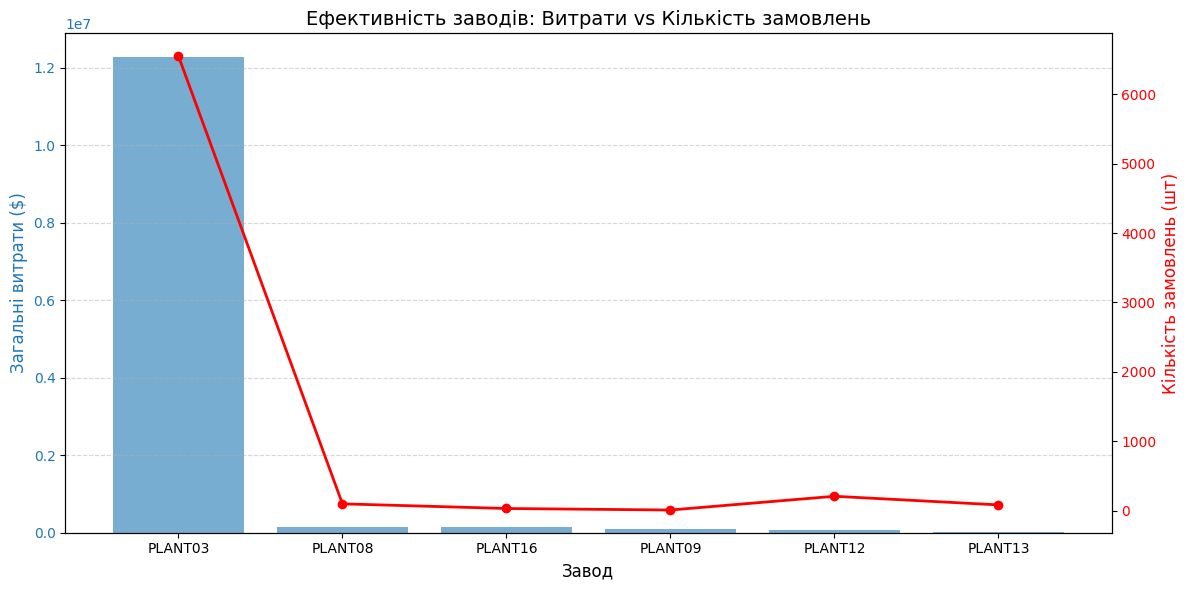

In [159]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

bars = ax1.bar(plant_stats['Plant Code'], plant_stats['Total_cost'], color='#1f77b4', alpha=0.6, label='Витрати ($)')

ax1.set_xlabel('Завод', fontsize=12)
ax1.set_ylabel('Загальні витрати ($)', color='#1f77b4', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#1f77b4')

ax1.grid(axis='y', linestyle='--', alpha=0.5)

ax2 = ax1.twinx() 

line = ax2.plot(plant_stats['Plant Code'], plant_stats['Order ID'], color='red', marker='o', linewidth=2, label='Кількість замовлень')

ax2.set_ylabel('Кількість замовлень (шт)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Ефективність заводів: Витрати vs Кількість замовлень', fontsize=14)
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()


Отже завод PLANT03 абсолютний чемпіон серед витрат, та відповідно кількності замовлень. Решта заводів просто шум. Варто попрацювати над оптимізацією прийняття замовлень, розпорошивши їх між іншими заводами.

Задача 3 Знайти заводи, які простоюють, і перевірити, чи можуть вони забрати частину роботи у перевантаженого PLANT03 
1. На скільки завантажені одні, а на скільки інші

In [248]:
load = orders.groupby('Plant Code').agg({'Order ID': 'count'}).reset_index()
load = load.rename(columns={'Order ID': 'Done'})

merged_load = pd.merge(wh_capacities, load, left_on='Plant ID', right_on='Plant Code', how='left')
merged_load['Done'] = merged_load['Done'].fillna(0)
merged_load = merged_load.rename(columns={'Daily Capacity ': 'Expected'})
merged_load['Plant Code'] = merged_load['Plant ID']

merged_load['Utilization %'] = ((merged_load['Done'] / merged_load['Expected']) * 100).round()
merged_load[['Plant Code', 'Done', 'Expected', 'Utilization %']].sort_values('Utilization %', ascending=False)


,Plant Code,Done,Expected,Utilization %
14,PLANT03,8541,1013,843.0
17,PLANT08,102,14,729.0
11,PLANT12,300,209,144.0
13,PLANT09,12,11,109.0
10,PLANT16,173,457,38.0
15,PLANT13,86,490,18.0
0,PLANT15,0,11,0.0
1,PLANT17,0,8,0.0
2,PLANT18,0,111,0.0
3,PLANT05,0,385,0.0


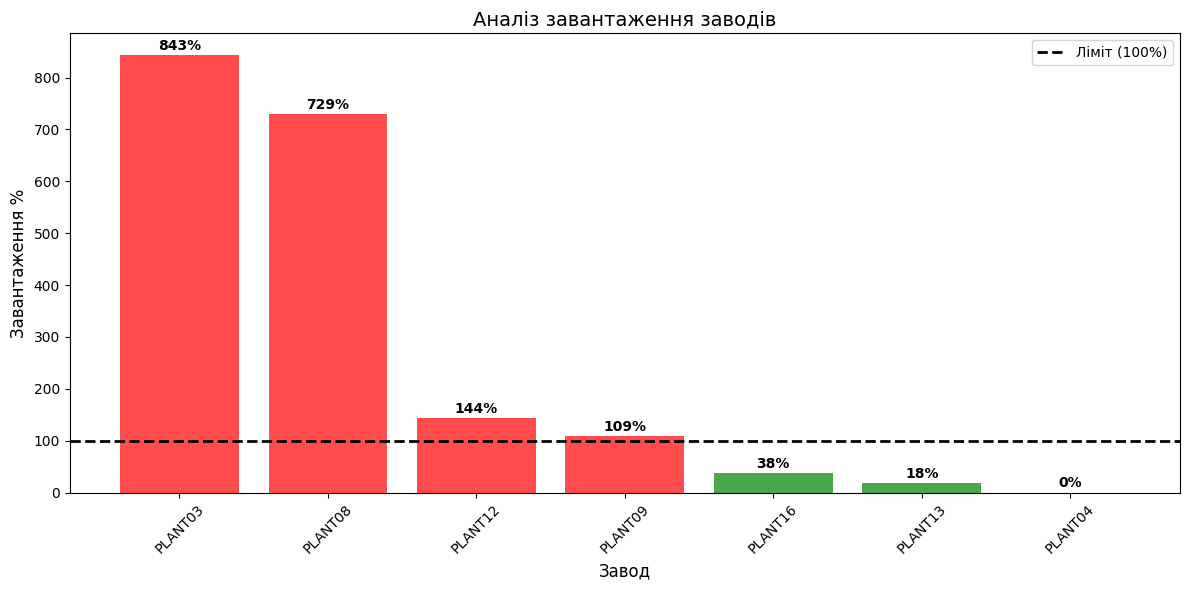

In [189]:
plot_data = merged_load.sort_values('Utilization %', ascending=False)

plt.figure(figsize=(12, 6))

colors = ['red' if x > 100 else 'green' for x in plot_data['Utilization %']]

plt.bar(plot_data['Plant Code'], plot_data['Utilization %'], color=colors, alpha=0.7)

plt.axhline(y=100, color='black', linestyle='--', linewidth=2, label='Ліміт (100%)')

plt.title('Аналіз завантаження заводів', fontsize=14)
plt.ylabel('Завантаження %', fontsize=12)
plt.xlabel('Завод', fontsize=12)
plt.xticks(rotation=45) 
plt.legend()

for i, val in enumerate(plot_data['Utilization %']):
    plt.text(i, val + 10, f"{int(val)}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Отже, ситуація критична, plant16, plant13, plant04 простоюють, інші - переповнені. 

Перевіримо, чи зможуть plant16, plant13, plant04 перейняти замовлення plant03, щоб допомогти.


In [249]:
plant03 = products_per_plant[products_per_plant['Plant Code'] == 'PLANT03']['Product ID'].unique()

candidates_with_stats = products_per_plant.merge(
    merged_load[['Plant Code', 'Utilization %', 'Expected', 'Done']], 
    on='Plant Code', 
    how='left'
)

suitable_plants = candidates_with_stats[
    (candidates_with_stats['Plant Code'] != 'PLANT03') &        
    (candidates_with_stats['Product ID'].isin(plant03)) &
    (candidates_with_stats['Utilization %'] < 100)         
]
ranked_plants = suitable_plants.groupby('Plant Code')['Product ID'].agg('count').reset_index()
ranked_plants.columns=['Plant Code', 'Match_Count']

ranked_plants['rank'] = ranked_plants['Match_Count'].rank(ascending=False, method='min')

ranked_plants.sort_values('rank')

,Plant Code,Match_Count,rank
0,PLANT02,83,1
5,PLANT10,72,2
6,PLANT11,71,3
1,PLANT04,55,4
2,PLANT05,30,5
3,PLANT06,6,6
4,PLANT07,1,7
7,PLANT17,1,7


План, для пошуку вільних місць:
1. Створюєм маску заводів що виробляють ті ж продукти що і плент 3 (змінна: завод де прийняли більше ніж можливо)
2. спроможність - те що вони прийняли = різниця, не використана можливість
3. тоді ми рахуєм кількість перевикористаної можливості і додаєм до не використаної можливості. надлишок потім

In [250]:
final_table = ranked_plants.merge(
    merged_load[['Plant Code', 'Expected', 'Done']], 
    on='Plant Code', 
    how='left'
)

final_table['Able_to_get'] = final_table['Expected'] - final_table['Done']

final_table.sort_values(['Match_Count', 'Able_to_get'], ascending=[False, False])

,Plant Code,Match_Count,rank,Expected,Done,Able_to_get
0,PLANT02,83,1,138,0,138
5,PLANT10,72,2,118,0,118
6,PLANT11,71,3,332,0,332
1,PLANT04,55,4,554,1,553
2,PLANT05,30,5,385,0,385
3,PLANT06,6,6,49,0,49
4,PLANT07,1,7,265,0,265
7,PLANT17,1,7,8,0,8


In [252]:
print(f'Вільно потенціалу для прийняття замовлень: {final_table['Able_to_get'].sum()}')

Вільно потенціалу для прийняття замовлень: 1848


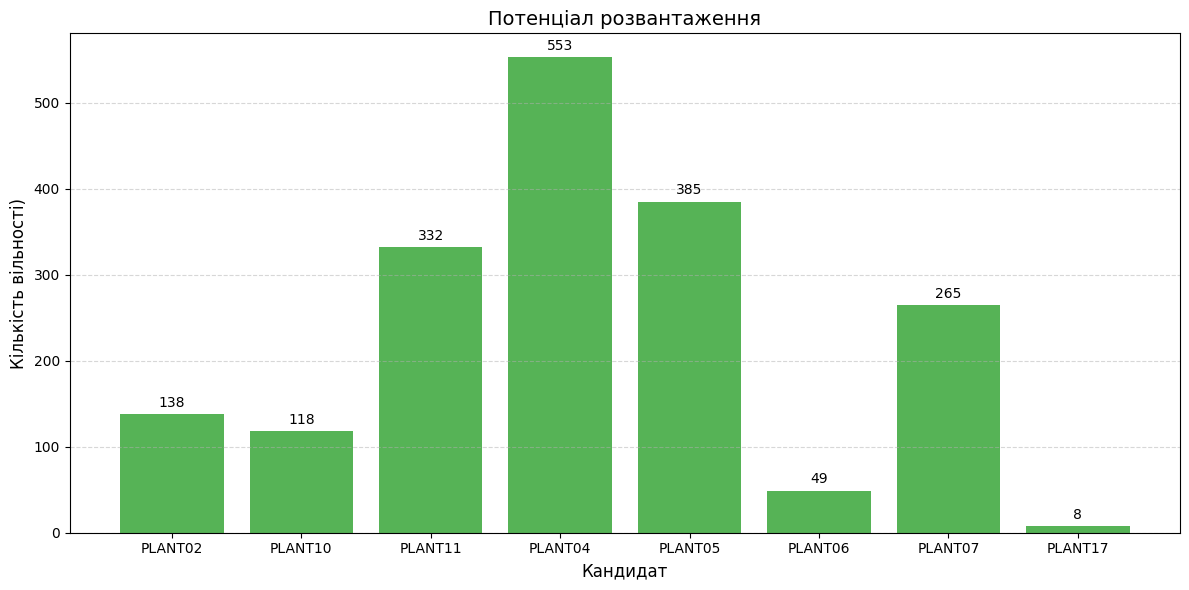

In [255]:
import matplotlib.pyplot as plt

plot_data = final_table.sort_values(['Match_Count', 'Able_to_get'], ascending=[False, False])

plt.figure(figsize=(12, 6))

bars = plt.bar(plot_data['Plant Code'], plot_data['Able_to_get'], color='#2ca02c', alpha=0.8)

plt.title('Потенціал розвантаження', fontsize=14)
plt.xlabel('Кандидат', fontsize=12)
plt.ylabel('Кількість вільності)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.bar_label(bars, padding=3, fmt='%d')

plt.tight_layout()
plt.show()

In [253]:
final_table['Able_to_get'].sum() - (merged_load.loc[merged_load['Plant Code']=='PLANT03', 'Done'].values[0] - merged_load.loc[merged_load['Plant Code']=='PLANT03', 'Expected'].values[0])

-5680